In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

## Simulating MA(1) Time Series

We will simulate and plot a few MA(1) time series, each with a different parameter, θ, using the arima_process module in statsmodels, just as we did for AR(1) models. We will look at an MA(1) model with a large positive θ and a large negative θ.

As before with AR , when inputting the coefficient , we must include the zero-lag coeffiecient of 1, but unlike the on AR models, the sign of the MA coefficient is what we would expect.For exmaple, for an MA(1) process with θ=-0.9. the array representing the MA parameters would be , ma=np.array([1,-0.9])

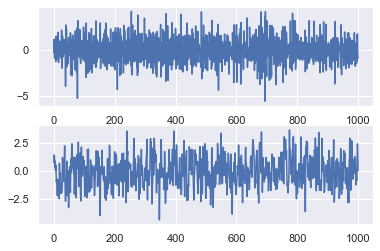

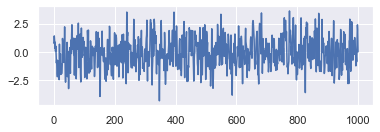

In [13]:
#importing the module for simulating the data
from statsmodels.tsa.arima_process import ArmaProcess

#Plot 1:MA parameter =-0.9
plt.subplot(2,1,1)
ar1=np.array([1])
ma1=np.array([1,-0.9])
MA_object1=ArmaProcess(ar1,ma1)
simulated_data_1=MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

#Plot 2:MA parameter =+0.9
plt.subplot(2,1,2)
ar2=np.array([1])
ma2=np.array([1,0.9])
MA_object2=ArmaProcess(ar1,ma2)
simulated_data_2=MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

#Plot 3:MA parameter =-0.3
plt.subplot(2,1,2)
ar2=np.array([1])
ma2=np.array([1,-0.3])
MA_object2=ArmaProcess(ar1,ma2)
simulated_data_3=MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

The two MA parameters produce different time series plots.

### Computing the ACF for Several MA Time Series

Unlike an AR(1) , an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyonf lag 2 . etc. The lag-1 autocorrelation for an MA(1) model is not θ,but rather θ/(1+θ^2).For example, if the MA parameter , θ , is =+0.9 , the first-lag autocorrelation will be , 0.9/(1+0.9^2)=0.497 , and the autocorrelation at all other lags will be zero.If the MA parameter , θ, is -0.9 , the first-lag autocorrelation will be,
-0.9/(1+(-0.9)^2)=-0.497.

We will verufy these autocorrelation functions for the three time series we generated before.

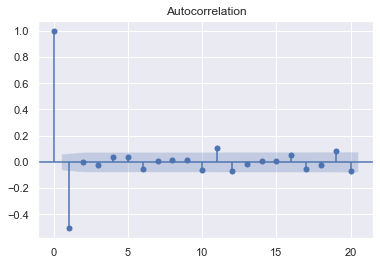

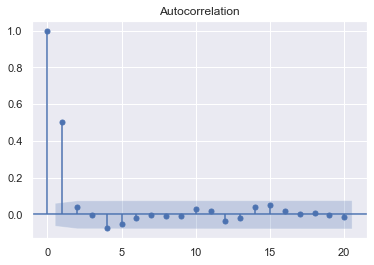

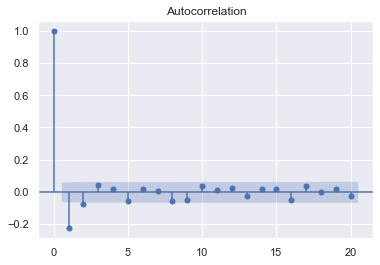

In [14]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

# Plot 2: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show()

### Estimating an MA Model
We will estimate the MA(1) parameter, , of one of the simulated series that we generated above. Since the parameters are known for a simulated series.

In [15]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1457.301
Method:                       css-mle   S.D. of innovations              1.038
Date:                Mon, 17 May 2021   AIC                           2920.602
Time:                        17:38:23   BIC                           2935.325
Sample:                             0   HQIC                          2926.198
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.003     -1.048      0.295      -0.008       0.002
ma.L1.y       -0.9193      0.011    -86.566      0.000      -0.940      -0.898
                                    Roots           

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


### Forecasting with MA Model
As we did with AR models, we will use MA models to forecast in-sample and out-of-sample data using statsmodels.

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


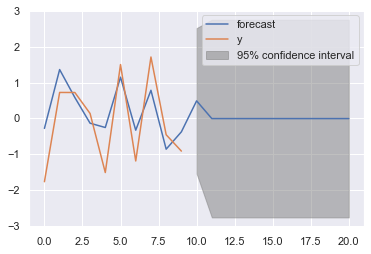

In [16]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

## Forecasting KBL price in future

In [19]:
kbl=pd.read_csv("datasets/kbl_all.csv")
kbl['Date']=pd.to_datetime(kbl.Date)
kbl=kbl.set_index(kbl.Date)
kbl=kbl.drop('Date',axis=1)
kbl=kbl['Closing Price']

kbl = kbl.resample(rule='Y').last()
kbl=kbl.dropna()

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings

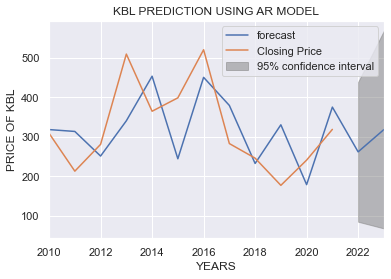

In [20]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(kbl, order=(0,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0,end='2023-05')
plt.legend(fontsize=8)
plt.xlabel('YEARS')
plt.ylabel("PRICE OF KBL")
plt.title("KBL PREDICTION USING AR MODEL")
plt.legend()
plt.show()